<a href="https://colab.research.google.com/github/frantholy/Telecom_X1_ALURA/blob/main/telecomX_ALURA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

-----------------------------------------------------------

## 📝 INTRODUCCIÓN CHALLENGE TELECOM X PARTE I - ALURA LATAM:

En este proyecto se analizan los datos de clientes de la empresa de telecomunicaciones **Telecom X** con la finalidad de identificar factores que influyen en la cancelación del servicio (churn).

**Objetivo del challenge:** *"Buscar, tratar y realizar un análisis exploratorio de los datos de la empresa (Realizar completamente el proceso de ETL)".*

**Diccionario de datos TELECOM X:**

- `customerID`: número de identificación único de cada cliente.
- `Churn`: si el cliente dejó o no la empresa.
- `gender`: género (masculino y femenino).
- `SeniorCitizen`: información sobre si un cliente tiene o no una edad igual o mayor a 65 años.
- `Partner`: si el cliente tiene o no una pareja.
- `Dependents`: si el cliente tiene o no dependientes.
- `tenure`: meses de contrato del cliente.
- `PhoneService`: suscripción al servicio telefónico.
- `MultipleLines`: suscripción a más de una línea telefónica.
- `InternetService`: suscripción a un proveedor de internet.
- `OnlineSecurity`: suscripción adicional de seguridad en línea.
- `OnlineBackup`: suscripción adicional de respaldo en línea.
- `DeviceProtection`: suscripción adicional de protección del dispositivo.
- `TechSupport`: suscripción adicional de soporte técnico, menor tiempo de espera.
- `StreamingTV`: suscripción de televisión por cable.
- `StreamingMovies`: suscripción de streaming de películas.
- `Contract`: tipo de contrato.
- `PaperlessBilling`: si el cliente prefiere recibir la factura en línea.
- `PaymentMethod`: forma de pago.
- `Charges.Monthly`: total de todos los servicios del cliente por mes.
- `Charges.Total`: total gastado por el cliente.

-------------

### IMPORTAR LIBRERIAS

In [ ]:
## Se importan las librerías esenciales.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from IPython.display import display, HTML
import warnings
warnings.filterwarnings('ignore')

### CARGAR ARCHIVO Y CREAR DATASET

Antes de iniciar con el análisis importaremos los datos en formato **JSON** de la **API de Telecom X** y crearemos un DataFrame. Este archivo contiene información esencial sobre los clientes, datos demográficos, tipo de servicio contratado y estado de evasión.

In [ ]:
# Cargar los datos directamente desde la API utilizando Python
raw_url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/main/TelecomX_Data.json'

try:
    # Convertir los datos a un DataFrame de Pandas
    df = pd.read_json(raw_url)
    print(f"DataFrame cargado exitosamente. Filas: {len(df)}, Columnas: {len(df.columns)}")
except Exception as e:
    print(f"Error al cargar el JSON: {e}")
    print("Verifica la URL y tu conexión a internet.")

DataFrame cargado exitosamente. Filas: 7267, Columnas: 6


### PRIMERAS REVISIONES DEL DF

In [ ]:
# Visualizamos el df para tener una idea general de como se encuentra dispuesta la información.
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [ ]:
# Visualizamos la información general del df.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


### DESANIDAR COLUMNAS ANIDADAS
> Las columnas **customer, phone, internet y account** deben ser separadas.

In [ ]:
# Expandir columnas anidadas y reemplazar en df
df = pd.concat([
    df[["customerID", "Churn"]],
    df["customer"].apply(pd.Series),
    df["phone"].apply(pd.Series),
    df["internet"].apply(pd.Series),
    df["account"].apply(pd.Series)
], axis=1)

# Verificar resultado
print(f"Dimensiones después de desanidar: {df.shape}")

## Visualizar
df.head()

Dimensiones después de desanidar: (7267, 20)


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,"{'Monthly': 65.6, 'Total': '593.3'}"
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,"{'Monthly': 59.9, 'Total': '542.4'}"
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,"{'Monthly': 73.9, 'Total': '280.85'}"
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,"{'Monthly': 98.0, 'Total': '1237.85'}"
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,"{'Monthly': 83.9, 'Total': '267.4'}"


> ##### Se debe desanidar la columna **Charges**.

In [ ]:
# Expandir la columna Charges y añadir al df
df = pd.concat([df.drop(columns=["Charges"]),
                df["Charges"].apply(pd.Series).rename(columns={"Monthly": "MonthlyCharges", "Total": "TotalCharges"})],
               axis=1)

# Verificar resultado
print(f"Dimensiones después de desanidar Charges: {df.shape}")
df.head()

Dimensiones después de desanidar Charges: (7267, 21)


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [ ]:
## Visualizamos la información general del df desanidado.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [ ]:
### Visualizamos los valores únicos de cada columna

for col in df.columns:
    print(f"{col}: {df[col].unique()}\n")

customerID: ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']

Churn: ['No' 'Yes' '']

gender: ['Female' 'Male']

SeniorCitizen: [0 1]

Partner: ['Yes' 'No']

Dependents: ['Yes' 'No']

tenure: [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]

PhoneService: ['Yes' 'No']

MultipleLines: ['No' 'Yes' 'No phone service']

InternetService: ['DSL' 'Fiber optic' 'No']

OnlineSecurity: ['No' 'Yes' 'No internet service']

OnlineBackup: ['Yes' 'No' 'No internet service']

DeviceProtection: ['No' 'Yes' 'No internet service']

TechSupport: ['Yes' 'No' 'No internet service']

StreamingTV: ['Yes' 'No' 'No internet service']

StreamingMovies: ['No' 'Yes' 'No internet service']

Contract: ['One year' 'Month-to-month' 'Two year']

PaperlessBilling: ['Yes' 'No']

PaymentMethod: ['Mailed check' 'Ele

### TRANSFORMAR DATOS

Se deben eliminar nulos, convertir columnas binarias a **1/0** y codificar variables categóricas para que queden en **1/0**.

In [ ]:
# Reemplazar '' por NaN en 'Churn' y eliminar esas filas
df['Churn'] = df['Churn'].replace('', np.nan)
df = df.dropna(subset=['Churn'])

# Mapear 'Churn' de 'No'/'Yes' a 0/1
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1}).astype('Int64')

# Convertir 'TotalCharges' a numérico, coercion convierte errores a NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Eliminar filas con NaN en 'TotalCharges' o imputar
df = df.dropna(subset=['TotalCharges'])

# Mapear variables binarias con valores especiales a 0/1
binary_special = {
    'PhoneService': {'Yes': 1, 'No': 0},
    'MultipleLines': {'Yes': 1, 'No': 0, 'No phone service': 0},
    'OnlineSecurity': {'Yes': 1, 'No': 0, 'No internet service': 0},
    'OnlineBackup': {'Yes': 1, 'No': 0, 'No internet service': 0},
    'DeviceProtection': {'Yes': 1, 'No': 0, 'No internet service': 0},
    'TechSupport': {'Yes': 1, 'No': 0, 'No internet service': 0},
    'StreamingTV': {'Yes': 1, 'No': 0, 'No internet service': 0},
    'StreamingMovies': {'Yes': 1, 'No': 0, 'No internet service': 0},
}

for col, mapping in binary_special.items():
    df[col] = df[col].map(mapping).astype('Int64')

# Mapear 'gender' explícitamente (Female=0, Male=1)
df['gender'] = df['gender'].map({'Female': 0, 'Male': 1}).astype('Int64')

# Mapear variables binarias simples (sin valores especiales)
binary_simple = ['Partner', 'Dependents', 'PaperlessBilling']
for col in binary_simple:
    df[col] = df[col].map({'Yes': 1, 'No': 0, 1:1, 0:0}).astype('Int64')

# Convertir 'SeniorCitizen' a Int64 (ya es int64, por si a caso)
df['SeniorCitizen'] = df['SeniorCitizen'].astype('Int64')

# Transformar variables categóricas restantes con get_dummies
cat_cols = ['InternetService', 'Contract', 'PaymentMethod']
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# Se elimina Customer ID porque no aportará valor predictivo al modelo.
df = df.drop(columns=['customerID'])

In [ ]:
# Visualizamos df limpio, con variables numéricas y dummies.
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7266
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Churn                                  7032 non-null   Int64  
 1   gender                                 7032 non-null   Int64  
 2   SeniorCitizen                          7032 non-null   Int64  
 3   Partner                                7032 non-null   Int64  
 4   Dependents                             7032 non-null   Int64  
 5   tenure                                 7032 non-null   int64  
 6   PhoneService                           7032 non-null   Int64  
 7   MultipleLines                          7032 non-null   Int64  
 8   OnlineSecurity                         7032 non-null   Int64  
 9   OnlineBackup                           7032 non-null   Int64  
 10  DeviceProtection                       7032 non-null   Int64  
 11  Tech

### ANÁLISIS EXPLORATORIO DE LOS DATOS

Como el df ya se encuentra correctamente tratado podemos realizar el análisis exploratorio de sus estadísticas, gráficos, correlaciones, etc.

In [ ]:
# Estadísticas descriptivas
display(HTML(f"<h5><b>Estadísticas descriptivas:</b></h5>"))
df.describe()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,PaperlessBilling,MonthlyCharges,TotalCharges,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
count,7032.0,7032.0,7032.0,7032.0,7032.0,7032.000000,7032.0,7032.0,7032.0,7032.0,...,7032.0,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.265785,0.504693,0.1624,0.482509,0.298493,32.421786,0.903299,0.421928,0.286547,0.344852,...,0.592719,64.798208,2283.300441,0.440273,0.216155,0.209329,0.239619,0.216297,0.336320,0.228100
std,0.441782,0.500014,0.368844,0.499729,0.457629,24.545260,0.295571,0.493902,0.45218,0.475354,...,0.491363,30.085974,2266.771362,0.496455,0.411650,0.406858,0.426881,0.411748,0.472483,0.419637
min,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,...,0.0,18.250000,18.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.0,0.0,0.0,0.0,9.000000,1.0,0.0,0.0,0.0,...,0.0,35.587500,401.450000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.0,1.0,0.0,0.0,0.0,29.000000,1.0,0.0,0.0,0.0,...,1.0,70.350000,1397.475000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.0,1.0,0.0,1.0,1.0,55.000000,1.0,1.0,1.0,1.0,...,1.0,89.862500,3794.737500,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.0,1.0,1.0,1.0,1.0,72.000000,1.0,1.0,1.0,1.0,...,1.0,118.750000,8684.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


> ### DISTRIBUCIÓN DE LA VARIABLE OBJETIVO CHURN

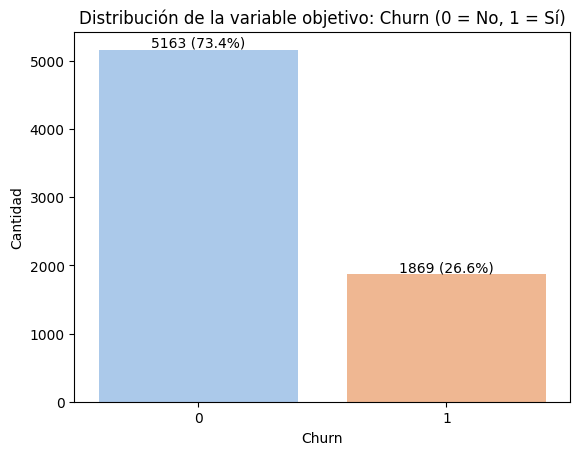

In [ ]:
# Crear gráfico
ax = sns.countplot(x='Churn', data=df, palette='pastel')

# Calcular totales
total = len(df)

# Agregar título y etiquetas
plt.title('Distribución de la variable objetivo: Churn (0 = No, 1 = Sí)')
plt.xlabel('Churn')
plt.ylabel('Cantidad')

# Agregar etiquetas de conteo + porcentaje
for container in ax.containers:
    ax.bar_label(container, labels=[
        f'{int(c.get_height())} ({c.get_height()/total:.1%})'
        for c in container
    ])

plt.show()

🔍 **Análisis de distribución de la variable objetivo:**

La variable objtivo se encuentra desbalanceada, esto podría afectar al rendimiento de los modelos, es por esto que es bueno considerar técnicas de balanceo como SMOTE antes de entrenar.

* Aproximadamente el **73.4%** de los clientes NO renuncian **(Churn = 0)**.
* Aproximadamente el **26.6%** sí renuncia **(Churn = 1)**.

> ### DISTRIBUCIÓN DE LA VARIABLES NÚMERICAS CONTINUAS

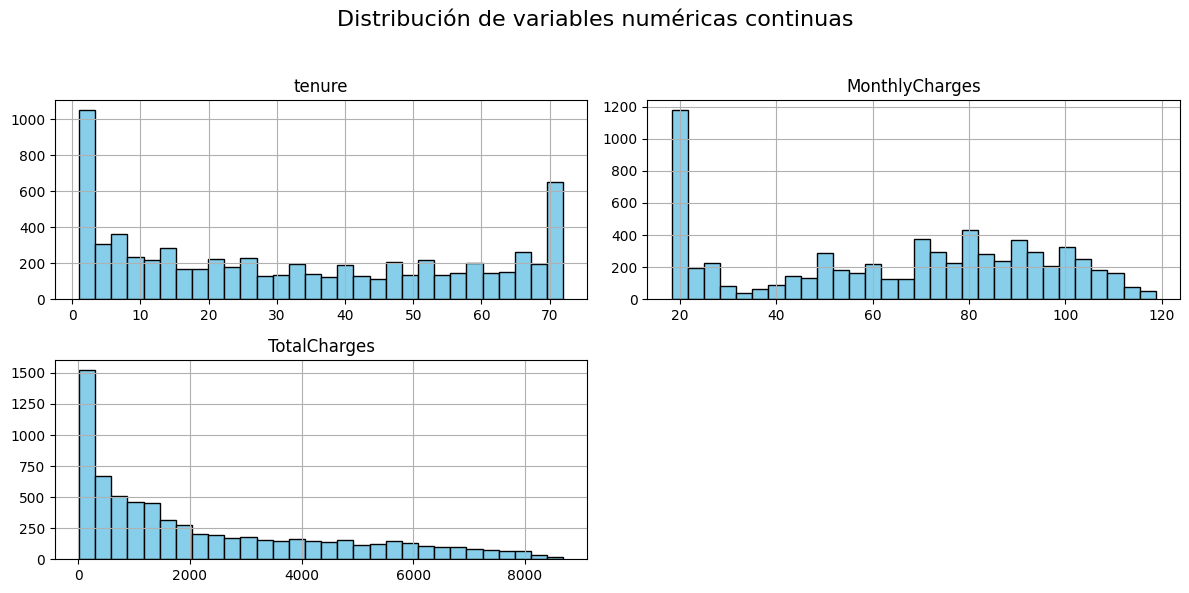

In [ ]:
# Filtrar solo columnas numéricas continuas
columnas_continuas = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Definir características de los histogramas
df[columnas_continuas].hist(
    bins=30,
    figsize=(12, 6),
    color='skyblue',
    edgecolor='black'
)

plt.suptitle('Distribución de variables numéricas continuas', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

> ### DISTRIBUCIÓN DE LA VARIABLES BINARIAS RESPECTO CHURN

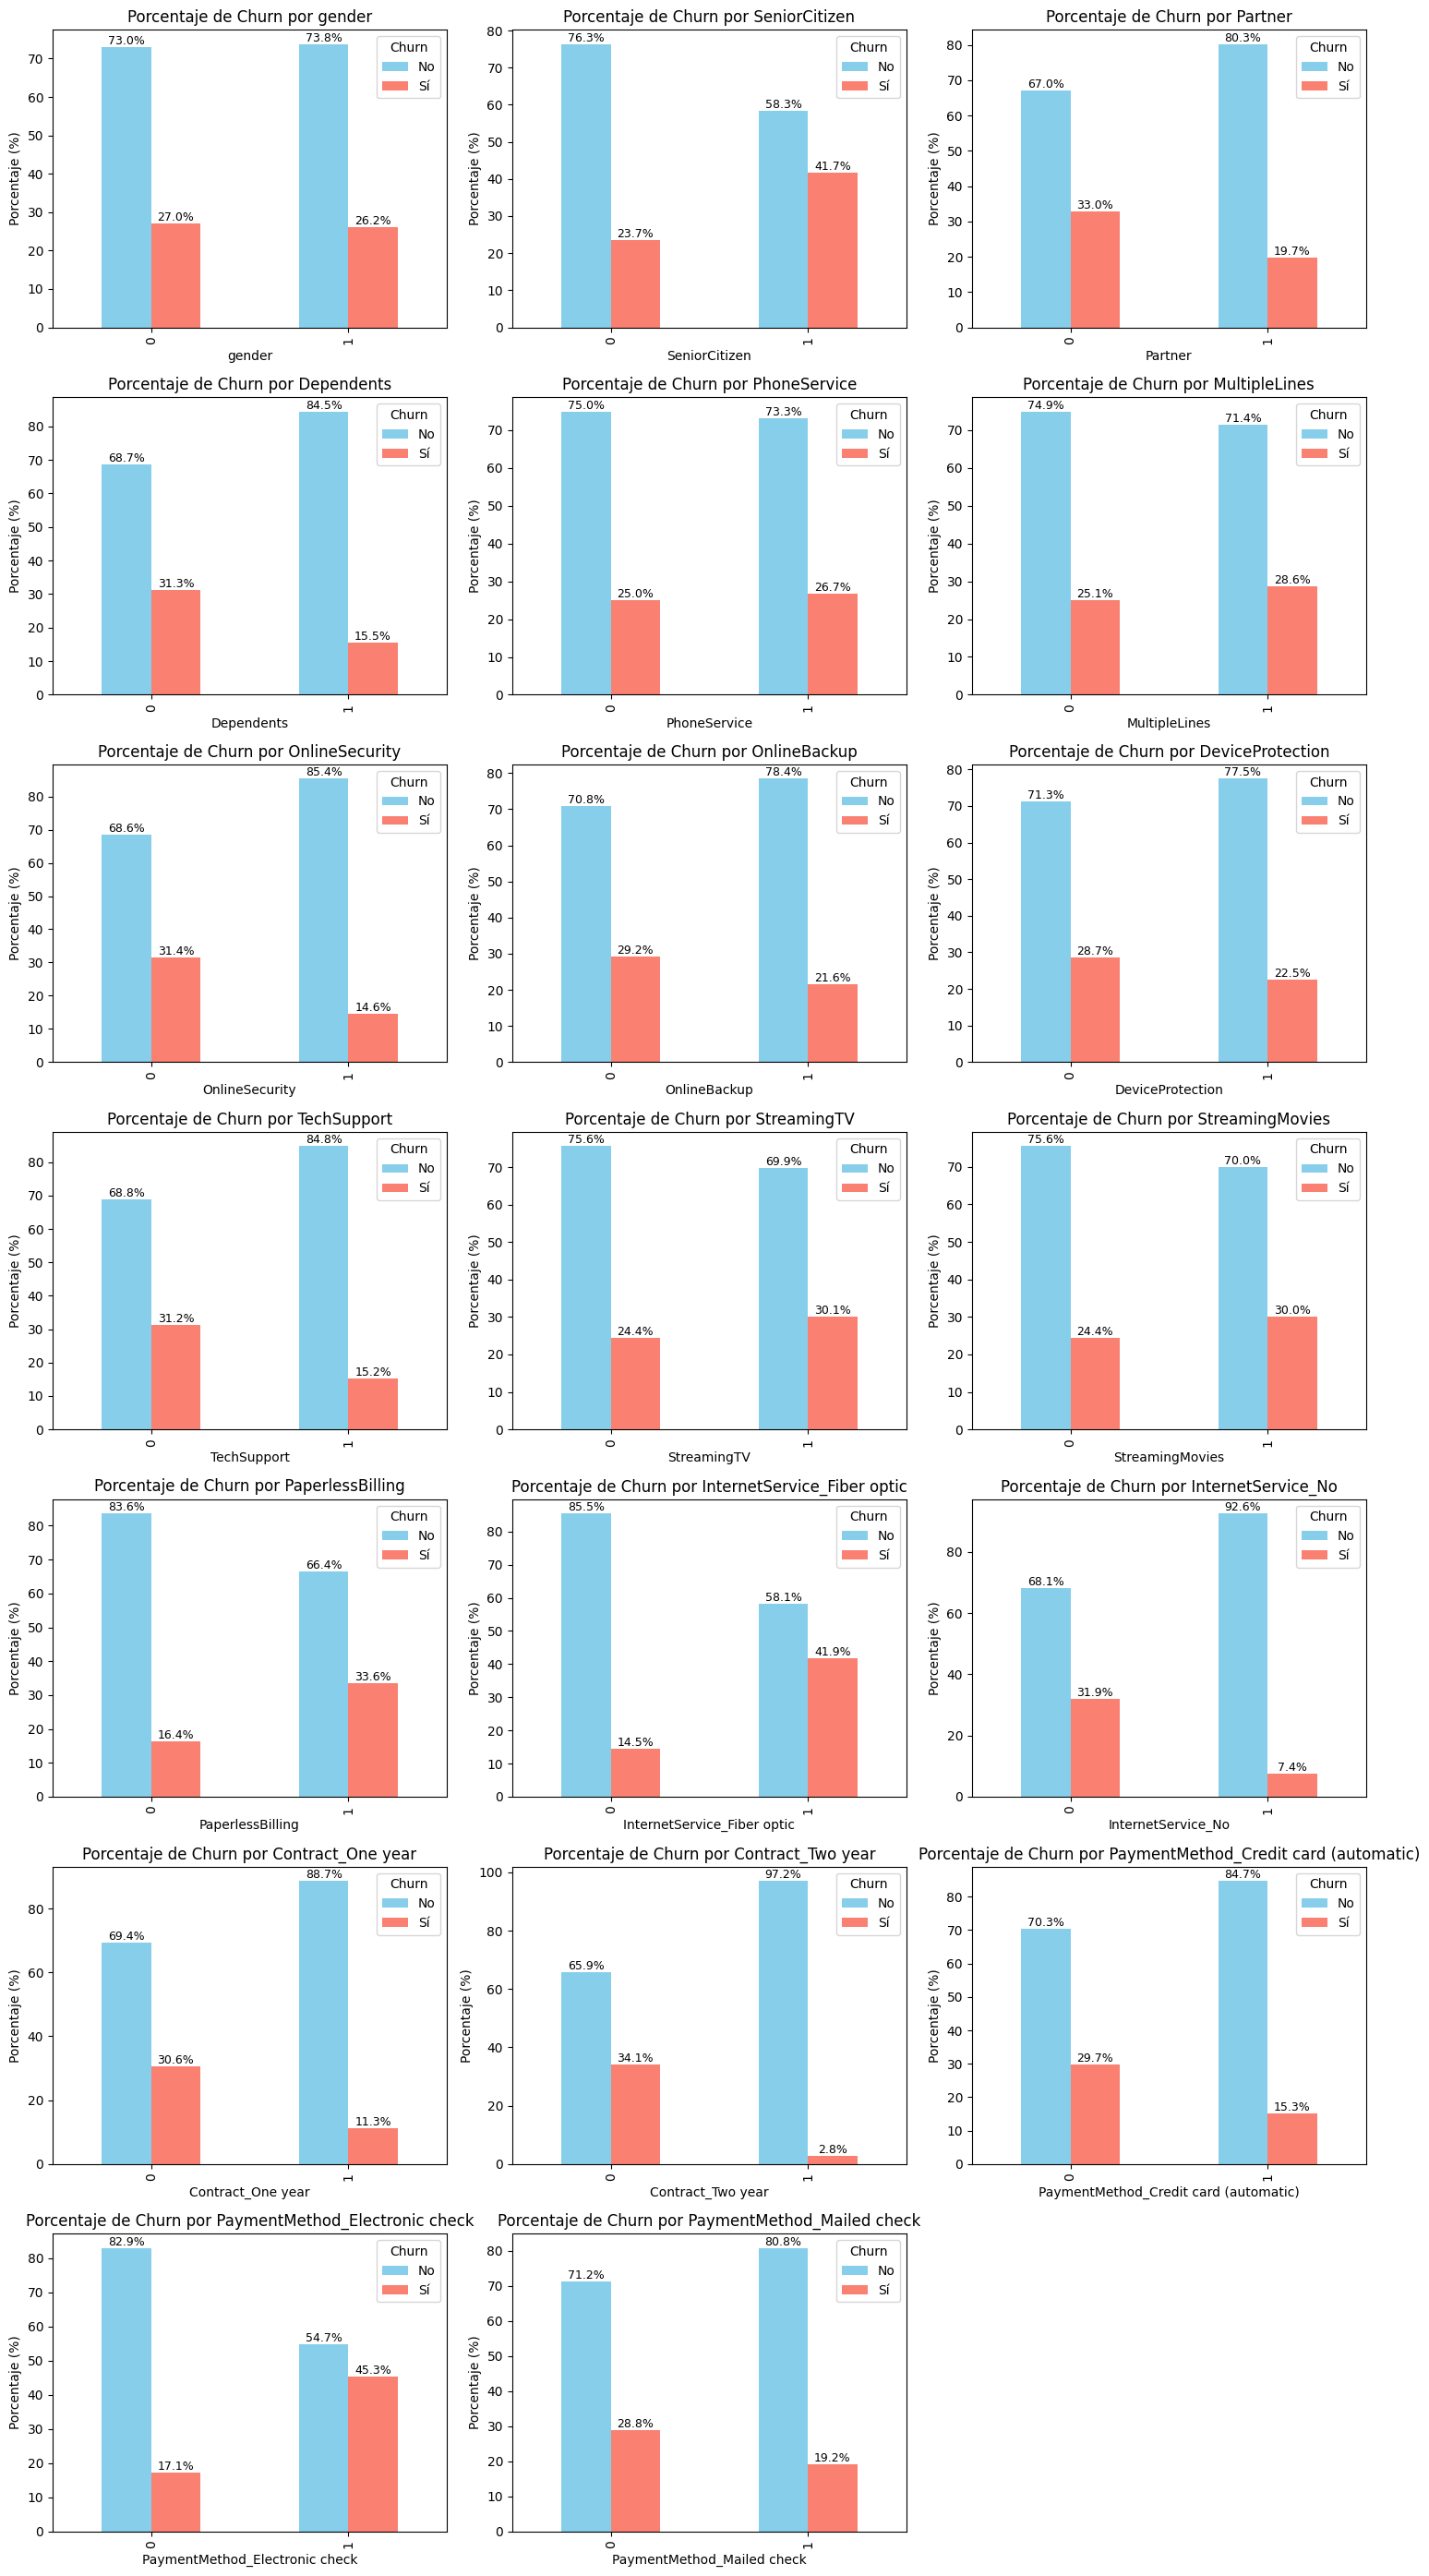

In [ ]:
# Filtrar columnas binarias (excluyendo 'Churn')
binarias = [col for col in df.columns if df[col].nunique() == 2 and col != 'Churn']

# Crear subplots
ncols = 3
nrows = len(binarias) // ncols + int(len(binarias) % ncols != 0)
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(5*ncols, 4*nrows))
axes = axes.flatten()

# Recorrer variables binarias y graficar Churn vs variable
for i, col in enumerate(binarias):
    ax = axes[i]

    # Calcular porcentajes por categoría y churn
    porcentajes = df.groupby(col)['Churn'].value_counts(normalize=True).mul(100).unstack()

    # Crear gráfico tipo bar
    porcentajes.plot(kind='bar', stacked=False, ax=ax, color=['skyblue', 'salmon'])

    # Agregar etiquetas encima de las barras
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.1f}%',
                    (p.get_x() + p.get_width()/2., p.get_height()),
                    ha='center', va='bottom', fontsize=9)

    # Títulos y etiquetas
    ax.set_title(f'Porcentaje de Churn por {col}', fontsize=12)
    ax.set_ylabel('Porcentaje (%)')
    ax.set_xlabel(col)
    ax.legend(title='Churn', labels=['No', 'Sí'])

# Eliminar ejes sobrantes si los hay
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

🔍 **Análisis de distribución de las variables binarias respecto CHURN:**

**1. Gender vs Churn:** Las tasas de Churn son muy similares entre géneros (**Male 26.2%**, **Female 27.0%** aprox). El género no parece ser un predictor relevante.

**2. SeniorCitizen vs Churn:** Los clientes que son **Senior Citizens** tienen una tasa de Churn más alta (**41.7%**) que los que no lo son (**23.7%**). Puede ser una variable relevante.

**3. Partner vs Churn:** Quienes tienen pareja tienen menos Churn (**19.7%**) comparado con los que no (**33%**). La estabilidad familiar podría influir en la retención.

**4. Dependents vs Churn:** Tener dependientes reduce el Churn (**15.5% vs 31.3%**).

**5. PhoneService vs Churn:** Diferencia mínima (**26.7% vs 27%**), poco relevante.

**6. MultipleLines vs Churn:** Los que tienen múltiples líneas tienen algo más de Churn (**28.6% vs 25.1%**), pero la diferencia es pequeña.

**7. OnlineSecurity vs Churn:** Tener OnlineSecurity reduce mucho el Churn (**14.6% vs 31.4%**). Variable muy relevante.

**8. OnlineBackup vs Churn:** Tener respaldo en línea reduce el Churn (**21.6% vs 26.2%**). Diferencia moderada.

**9. DeviceProtection vs Churn:** Tener protección de dispositivos reduce el Churn (**22.5% vs 28.7%**). Diferencia moderada.

**10. TechSupport vs Churn:** Tener soporte técnico reduce mucho el Churn (**15.2% vs 31.2%**). Variable muy relevante.

**11. StreamingTV vs Churn:** Diferencia pequeña (**30.1% vs 24.6%**). Poca relevancia.

**12. StreamingMovies vs Churn:** Patrón casi idéntico a StreamingTV, con poca diferencia.

**13. PaperlessBilling vs Churn:** Los clientes con facturación electrónica tienen más Churn (**33.6% vs 18.4%**). Variable relevante, pero en sentido inverso.

**14. InternetService_Fiber optic vs Churn:** Muy alto Churn con fibra óptica (**41.9% vs 14.5%**). Posiblemente relacionado con competencia o problemas de servicio.

**15. InternetService_No vs Churn:** Los que no tienen Internet casi no se van (**7.4%**), pero también son pocos.

**16. Contract_One year vs Churn:** Contrato de 1 año reduce el Churn (**11.3% vs 30.6%**). Variable muy relevante.

**17. Contract_Two year vs Churn:** Contrato de 2 años reduce drásticamente el Churn (**2.8% vs 34.1%**). Variable con mayor impacto.

**18. PaymentMethod_Credit card (automatic) vs Churn:** Pago automático con tarjeta reduce el Churn (**15.3% vs 29.7%**). Muy relevante.

**19. PaymentMethod_Electronic check vs Churn:** El cheque electrónico tiene la mayor tasa de Churn (**45.3%**). Variable muy relevante.

**20. PaymentMethod_Mailed check vs Churn:** Cheque enviado por correo tiene menos Churn (**19.2% vs 28.8%**). Algo relevante.

---

💡 **Conclusiones generales**  
**Variables más relevantes** (mayor diferencia de tasas de Churn):  
- Contract  
- PaymentMethod_Electronic check  
- InternetService_Fiber optic  
- OnlineSecurity  
- TechSupport  
- SeniorCitizen  

**Variables con poca influencia:**  
- Gender  
- PhoneService  
- StreamingTV  
- StreamingMovies

> ### MATRIZ DE CORRELACIONES

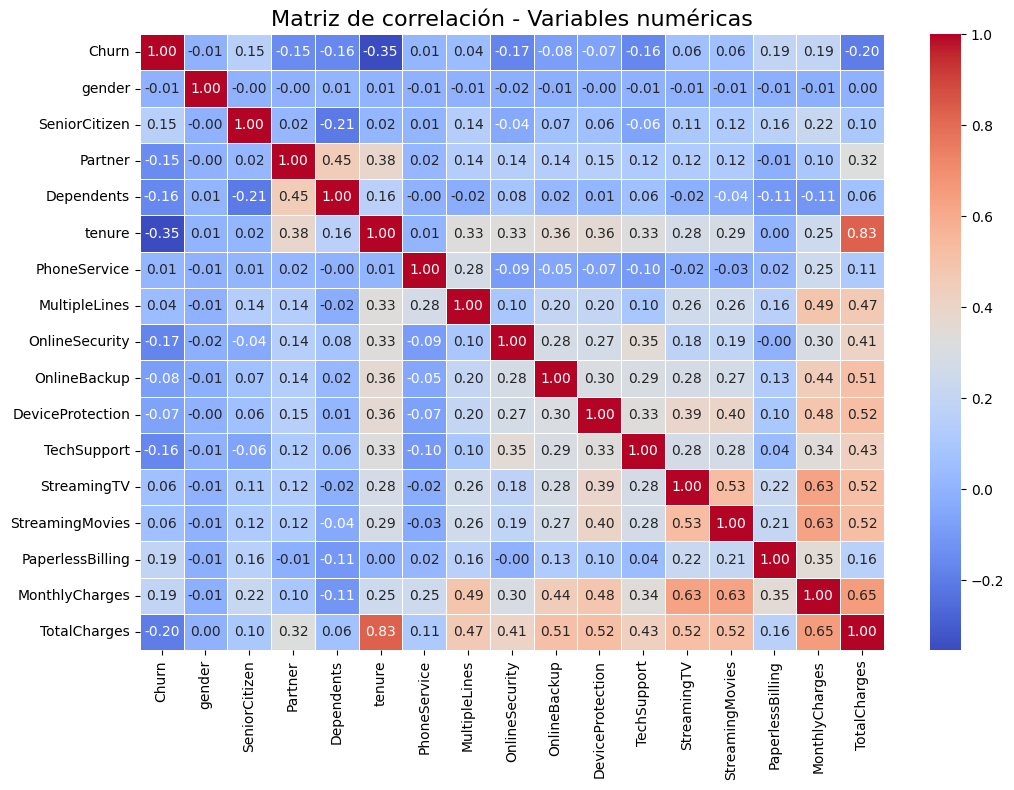

In [ ]:
# Filtrar solo las columnas numéricas
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Calcular matriz de correlación
corr_matrix = numeric_df.corr()

# Graficar Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de correlación - Variables numéricas', fontsize=16)
plt.show()

🔍 **Análisis de correlaciones con CHURN:**

> #### Mayor correlación negativa (menos Churn)
- **tenure (-0.35)** → Clientes con más tiempo tienen menor probabilidad de irse.
- **TotalCharges (-0.20)** → Clientes con cargos acumulados más altos (relacionado con tenure) tienen menor probabilidad de Churn.
- **OnlineSecurity (-0.17)** y **TechSupport (-0.16)** → Tener estos servicios reduce el Churn.
- **Partner (-0.15)** y **Dependents (-0.16)** → Tener pareja o dependientes se asocia a menor Churn.

> #### Mayor correlación positiva (más Churn)
- **PaperlessBilling (+0.19)** → La facturación electrónica aumenta la probabilidad de Churn.
- **MonthlyCharges (+0.19)** → Cuanto mayor la factura mensual, más probabilidad de Churn.
- **SeniorCitizen (+0.15)** → Ser adulto mayor aumenta el Churn.

---

> #### Correlaciones entre variables predictoras (posible multicolinealidad)
- **tenure y TotalCharges → 0.83** → Muy alta correlación. Si se usan modelos sensibles a multicolinealidad (ej. regresión logística), conviene usar solo una.
- **StreamingTV y StreamingMovies → 0.63** → Alta correlación, ambos servicios suelen ir juntos.
- **MonthlyCharges y TotalCharges → 0.65** → Relación esperada (TotalCharges ≈ MonthlyCharges × tiempo, con ajustes).
- **OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport** → correlaciones moderadas (~0.3–0.5), indicando que algunos clientes contratan estos servicios en conjunto.

---

> #### Variables poco correlacionadas con Churn
- **gender (≈0)**  
- **PhoneService (≈0)**  
- **MultipleLines (0.04)**  
- **StreamingTV (0.06)**  
- **StreamingMovies (0.06)**  

Estas variables tienen muy poca relación individual con Churn.

---

> #### Posibles conclusiones para modelado
- **Variables con fuerza predictiva alta:**  
  tenure, TotalCharges, MonthlyCharges, PaperlessBilling, SeniorCitizen, OnlineSecurity, TechSupport.

- **Eliminar o codificar por multicolinealidad:**  
  tenure y TotalCharges; StreamingTV y StreamingMovies.

- **Variables prescindibles:**  
  gender, PhoneService, MultipleLines, StreamingTV, StreamingMovies.

-----------------------------------------------------------

## 📝 CONCLUSIÓN CHALLENGE TELECOM X PARTE I - ALURA LATAM:

El análisis revela que ciertas variables tienen un impacto significativo en la probabilidad de que un cliente abandone el servicio:

### Variables con mayor influencia en Churn
- **Contratos a largo plazo (Contract_One year, Contract_Two year)** y **métodos de pago electrónicos** reducen significativamente el Churn.  
- **Servicios de valor agregado** como **OnlineSecurity** y **TechSupport** disminuyen la probabilidad de abandono.  
- **Clientes senior** y aquellos con **facturación electrónica o fibra óptica** presentan mayor Churn.  
- **Tenure y TotalCharges** muestran correlación negativa con Churn, indicando que la fidelidad y la inversión acumulada reducen el abandono.

### Variables con baja influencia
- Género, PhoneService, StreamingTV y StreamingMovies presentan poca relación con Churn y pueden ser prescindibles para modelos simples.

### Consideraciones para modelado
- Variables altamente correlacionadas (**tenure y TotalCharges**, **StreamingTV y StreamingMovies**) deben manejarse con cuidado para evitar multicolinealidad en modelos sensibles.  
- Las variables más predictivas y relevantes para modelado son: **Contract, PaymentMethod, OnlineSecurity, TechSupport, SeniorCitizen, Tenure, MonthlyCharges**.  

**💡 Resumen:**  
El Churn se ve fuertemente influenciado por la duración del contrato, los métodos de pago, la edad del cliente y la contratación de servicios adicionales. Variables operativas o demográficas como género o servicios básicos tienen impacto limitado.

---------------

## 🌟 RECOMENDACIONES PARA REDUCIR CHURN:

### 1. 📝 Fortalecer la fidelización mediante contratos
- Promover **contratos a largo plazo (1 o 2 años)** ofreciendo incentivos como descuentos o beneficios exclusivos.  
- Facilitar la **renovación temprana** de contratos con ventajas claras para el cliente.

### 2. 💳 Optimizar métodos de pago
- Incentivar el uso de **pagos automáticos o electrónicos**, asociados a menor abandono.  
- Proporcionar **recordatorios y facilidades de pago** para evitar interrupciones de servicio.

### 3. 🛡 Mejorar servicios de valor agregado
- Destacar y promocionar **OnlineSecurity** y **TechSupport**, que reducen significativamente el Churn.  
- Ofrecer **paquetes combinados** o descuentos por contratar varios servicios adicionales.

### 4. ⚠ Atender a clientes de mayor riesgo
- **Senior Citizens** y clientes con **fibra óptica** presentan mayor propensión a abandonar.  
- Recomendaciones:
  - Comunicaciones personalizadas y programas de fidelización específicos.  
  - Encuestas periódicas para identificar problemas de satisfacción.

### 5. 🎁 Incentivar la permanencia de clientes de largo plazo
- Premiar la **antigüedad del cliente (tenure)** con beneficios progresivos: descuentos, promociones o upgrades de servicios.  
- Ofrecer **paquetes personalizados** para clientes con alto gasto mensual (TotalCharges).

### 6. ⚙ Optimizar esfuerzos en servicios de bajo impacto
- Servicios como **PhoneService, StreamingTV y StreamingMovies** tienen poca influencia sobre Churn; priorizar recursos en servicios de mayor impacto.

### 7. 📊 Monitoreo y análisis continuo
- Mantener un **seguimiento constante del Churn y de la satisfacción del cliente**.  
- Implementar **alertas tempranas** para detectar clientes en riesgo y actuar proactivamente.

-------------